In [93]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
import statistics
from scipy import stats

# Read Data

In [94]:
df = pd.read_csv('credit_customers.csv')
df

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6.0,critical/other existing credit,radio/tv,1169.0,no known savings,>=7,4.0,male single,none,...,real estate,67.0,none,own,2.0,skilled,1.0,yes,yes,good
1,0<=X<200,48.0,existing paid,radio/tv,5951.0,<100,1<=X<4,2.0,female div/dep/mar,none,...,real estate,22.0,none,own,1.0,skilled,1.0,none,yes,bad
2,no checking,12.0,critical/other existing credit,education,2096.0,<100,4<=X<7,2.0,male single,none,...,real estate,49.0,none,own,1.0,unskilled resident,2.0,none,yes,good
3,<0,42.0,existing paid,furniture/equipment,7882.0,<100,4<=X<7,2.0,male single,guarantor,...,life insurance,45.0,none,for free,1.0,skilled,2.0,none,yes,good
4,<0,24.0,delayed previously,new car,4870.0,<100,1<=X<4,3.0,male single,none,...,no known property,53.0,none,for free,2.0,skilled,2.0,none,yes,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,no checking,12.0,existing paid,furniture/equipment,1736.0,<100,4<=X<7,3.0,female div/dep/mar,none,...,real estate,31.0,none,own,1.0,unskilled resident,1.0,none,yes,good
996,<0,30.0,existing paid,used car,3857.0,<100,1<=X<4,4.0,male div/sep,none,...,life insurance,40.0,none,own,1.0,high qualif/self emp/mgmt,1.0,yes,yes,good
997,no checking,12.0,existing paid,radio/tv,804.0,<100,>=7,4.0,male single,none,...,car,38.0,none,own,1.0,skilled,1.0,none,yes,good
998,<0,45.0,existing paid,radio/tv,1845.0,<100,1<=X<4,4.0,male single,none,...,no known property,23.0,none,for free,1.0,skilled,1.0,yes,yes,bad


In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   checking_status         1000 non-null   object 
 1   duration                1000 non-null   float64
 2   credit_history          1000 non-null   object 
 3   purpose                 1000 non-null   object 
 4   credit_amount           1000 non-null   float64
 5   savings_status          1000 non-null   object 
 6   employment              1000 non-null   object 
 7   installment_commitment  1000 non-null   float64
 8   personal_status         1000 non-null   object 
 9   other_parties           1000 non-null   object 
 10  residence_since         1000 non-null   float64
 11  property_magnitude      1000 non-null   object 
 12  age                     1000 non-null   float64
 13  other_payment_plans     1000 non-null   object 
 14  housing                 1000 non-null   o

# Checking Data

In [96]:
df.isnull().sum()

checking_status           0
duration                  0
credit_history            0
purpose                   0
credit_amount             0
savings_status            0
employment                0
installment_commitment    0
personal_status           0
other_parties             0
residence_since           0
property_magnitude        0
age                       0
other_payment_plans       0
housing                   0
existing_credits          0
job                       0
num_dependents            0
own_telephone             0
foreign_worker            0
class                     0
dtype: int64

In [97]:
df.duplicated().sum()

0

# Getting Information from data

In [98]:
import matplotlib.pyplot as plt

C:\Users\MrBento\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<Axes: xlabel='duration', ylabel='Density'>

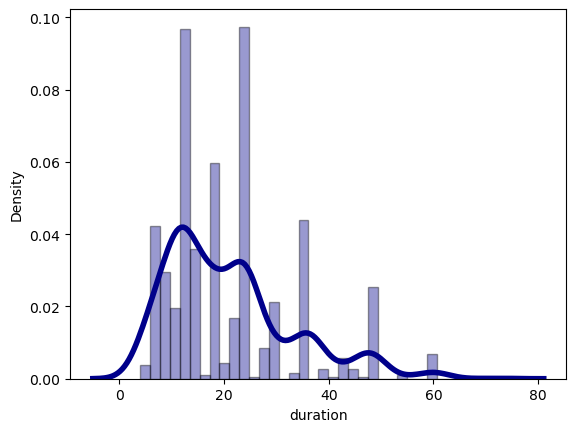

In [99]:
sns.distplot(df['duration'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

C:\Users\MrBento\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<Axes: xlabel='credit_amount', ylabel='Density'>

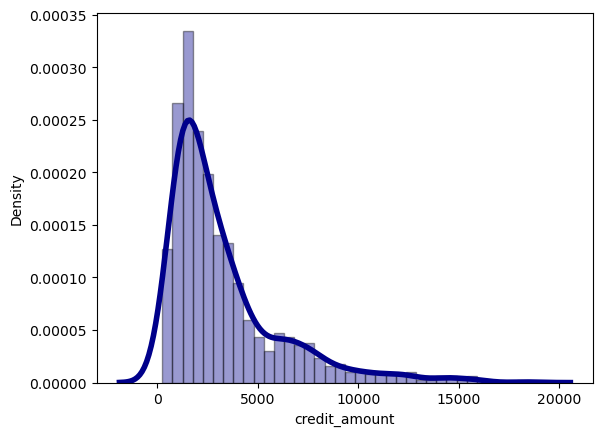

In [100]:
sns.distplot(df['credit_amount'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

C:\Users\MrBento\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<Axes: xlabel='age', ylabel='Density'>

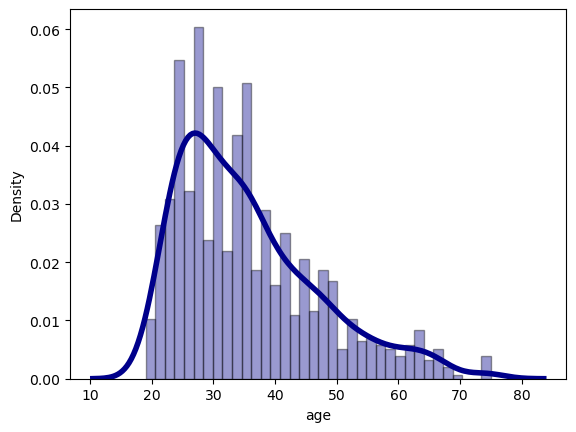

In [101]:
sns.distplot(df['age'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

In [102]:
df_purpose = df.groupby('purpose')['duration'].count().reset_index()

In [103]:
df_purpose.sort_values(['duration'], ascending=False)
df_purpose['Freq'] = df_purpose['duration']
df_purpose = df_purpose.drop('duration', axis=1)

In [104]:
df_top_purpose = df_purpose.loc[(df_purpose['Freq']>=100)]
df_top_purpose

,purpose,Freq
3,furniture/equipment,181
4,new car,234
6,radio/tv,280
9,used car,103


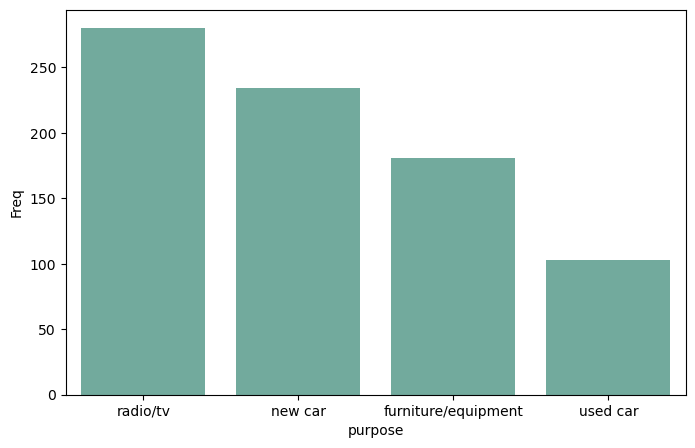

In [105]:
import seaborn as sns
plt.figure(figsize=(8, 5))

# Reorder this data frame
df_top_purpose = df_top_purpose.sort_values(['Freq'], ascending=False).reset_index(drop=True)

# Make a barplot
sns.barplot(
    x="purpose", 
    y="Freq", 
    data=df_top_purpose, 
    estimator=sum, 
    ci=None, 
    color='#69b3a2'
);

In [106]:
df_personal = df.groupby('personal_status')['duration'].count().reset_index()
df_personal['Freq'] = df_personal['duration']
df_personal = df_personal.drop('duration', axis=1)
df_personal

,personal_status,Freq
0,female div/dep/mar,310
1,male div/sep,50
2,male mar/wid,92
3,male single,548


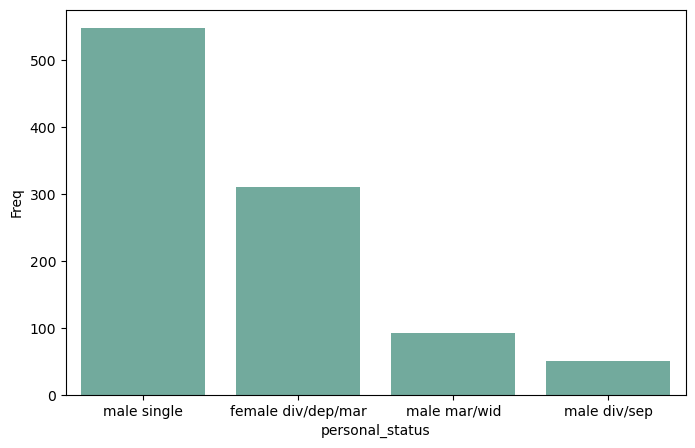

In [107]:
import seaborn as sns
plt.figure(figsize=(8, 5))

# Reorder this data frame
df_personal = df_personal.sort_values(['Freq'], ascending=False).reset_index(drop=True)

# Make a barplot
sns.barplot(
    x="personal_status", 
    y="Freq", 
    data=df_personal, 
    estimator=sum, 
    ci=None, 
    color='#69b3a2'
);

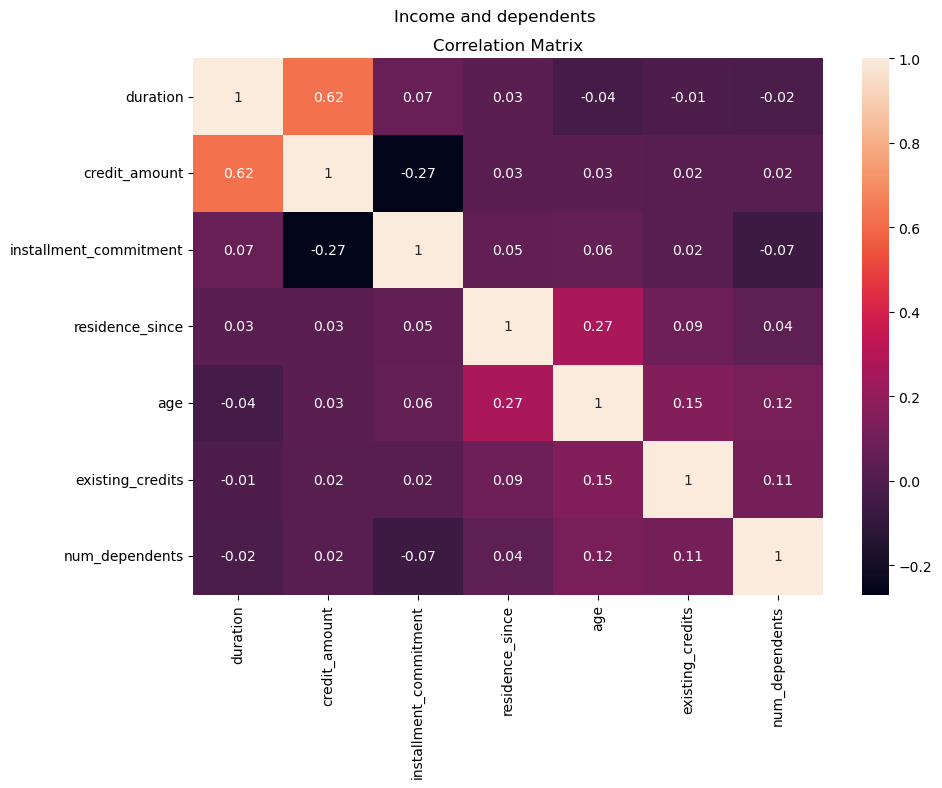

In [108]:
df_correlation_matrix = pd.DataFrame(df)

plt.figure(figsize=(10,8))
sns.heatmap(df_correlation_matrix.corr().round(2), annot=True)
plt.title('Correlation Matrix')
plt.suptitle('Income and dependents')
plt.tight_layout()

# Transform Data for Classification purposes

In [109]:
n = 1
for (columnName, columnData) in df.iteritems():
    if columnData.dtype == 'O':
        print('S.no   : ', n)
        print('Name   : ', columnName)
        print('Unique : ', columnData.unique())
        print('No     : ',len(columnData.unique()))
        print()
        n+=1
    else:
        pass

S.no   :  1
Name   :  checking_status
Unique :  ['<0' '0<=X<200' 'no checking' '>=200']
No     :  4

S.no   :  2
Name   :  credit_history
Unique :  ['critical/other existing credit' 'existing paid' 'delayed previously'
 'no credits/all paid' 'all paid']
No     :  5

S.no   :  3
Name   :  purpose
Unique :  ['radio/tv' 'education' 'furniture/equipment' 'new car' 'used car'
 'business' 'domestic appliance' 'repairs' 'other' 'retraining']
No     :  10

S.no   :  4
Name   :  savings_status
Unique :  ['no known savings' '<100' '500<=X<1000' '>=1000' '100<=X<500']
No     :  5

S.no   :  5
Name   :  employment
Unique :  ['>=7' '1<=X<4' '4<=X<7' 'unemployed' '<1']
No     :  5

S.no   :  6
Name   :  personal_status
Unique :  ['male single' 'female div/dep/mar' 'male div/sep' 'male mar/wid']
No     :  4

S.no   :  7
Name   :  other_parties
Unique :  ['none' 'guarantor' 'co applicant']
No     :  3

S.no   :  8
Name   :  property_magnitude
Unique :  ['real estate' 'life insurance' 'no known propert

In [110]:
df[['sex', 'marriage']] = df.personal_status.str.split(" ", expand = True)
df.drop(['personal_status'], axis=1, inplace = True)

In [111]:
df['checking_status'].replace(['no checking', '<0', '0<=X<200', '>=200'], [0,1,2,3], inplace = True)
df['credit_history'].replace(['critical/other existing credit', 'delayed previously' , 'existing paid', 'no credits/all paid', 'all paid'], [0,1,2,3,4], inplace = True)
df['purpose'].replace(['business', 'new car','used car', 'education', 'retraining', 'other','domestic appliance','radio/tv','furniture/equipment','repairs'], [0,9,8,7,6,5,4,3,2,1], inplace = True)
df['savings_status'].replace(['no known savings', '<100','100<=X<500','500<=X<1000','>=1000'], [0,1,2,3,4], inplace = True)
df['employment'].replace(['unemployed', '<1','1<=X<4','4<=X<7','>=7'], [0,1,2,3,4], inplace = True)
df['other_parties'].replace(['none', 'co applicant', 'guarantor'], [0,1,2], inplace = True)
df['property_magnitude'].replace(['no known property', 'life insurance', 'car', 'real estate'], [0,1,2,3], inplace = True)
df['other_payment_plans'].replace(['none', 'stores', 'bank'], [0,1,2], inplace = True)
df['housing'].replace(['for free', 'rent', 'own'], [0,1,2], inplace = True)
df['job'].replace(['unemp/unskilled non res', 'unskilled resident', 'skilled', 'high qualif/self emp/mgmt'], [0,1,2,3], inplace = True)
df['own_telephone'].replace(['yes', 'none'], [1,0], inplace = True)
df['foreign_worker'].replace(['yes', 'no'], [1,0], inplace = True)
df['class'].replace(['good', 'bad'], [1,0], inplace = True)
df['sex'].replace(['male', 'female'], [1,0], inplace = True)
df['marriage'].replace(['single', 'div/sep','div/dep/mar','mar/wid'], [0,1,2,3], inplace = True)

In [112]:
df.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,other_parties,residence_since,...,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class,sex,marriage
0,1,6.0,0,3,1169.0,0,4,4.0,0,4.0,...,0,2,2.0,2,1.0,1,1,1,1,0
1,2,48.0,2,3,5951.0,1,2,2.0,0,2.0,...,0,2,1.0,2,1.0,0,1,0,0,2
2,0,12.0,0,7,2096.0,1,3,2.0,0,3.0,...,0,2,1.0,1,2.0,0,1,1,1,0
3,1,42.0,2,2,7882.0,1,3,2.0,2,4.0,...,0,0,1.0,2,2.0,0,1,1,1,0
4,1,24.0,1,9,4870.0,1,2,3.0,0,4.0,...,0,0,2.0,2,2.0,0,1,0,1,0


In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   checking_status         1000 non-null   int64  
 1   duration                1000 non-null   float64
 2   credit_history          1000 non-null   int64  
 3   purpose                 1000 non-null   int64  
 4   credit_amount           1000 non-null   float64
 5   savings_status          1000 non-null   int64  
 6   employment              1000 non-null   int64  
 7   installment_commitment  1000 non-null   float64
 8   other_parties           1000 non-null   int64  
 9   residence_since         1000 non-null   float64
 10  property_magnitude      1000 non-null   int64  
 11  age                     1000 non-null   float64
 12  other_payment_plans     1000 non-null   int64  
 13  housing                 1000 non-null   int64  
 14  existing_credits        1000 non-null   f

# Classification Machine Learning

In [114]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# load dataset
X = df.drop(['class'],axis=1)
Y = df['class']

from sklearn.preprocessing import StandardScaler

# Membuat objek scaler
scaler = StandardScaler()

# Menormalisasi data
normalized_data = scaler.fit_transform(X)

# Mengubah data yang telah dinormalisasi ke bentuk semula
original_data = scaler.inverse_transform(normalized_data)


In [115]:
from sklearn.model_selection import train_test_split
X_train, X_test,Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state = 0)

# Decision Tree Classification

In [116]:
from sklearn import tree
df_decision_tree = tree.DecisionTreeClassifier(ccp_alpha=0.01)#build
df_decision_tree.fit(X_train,Y_train)#train
df_decision_tree.score(X_test,Y_test)#predict

y_pred = df_decision_tree.predict(X_test)
df_decision_tree.score(X_test,Y_test)

0.7133333333333334

In [117]:
y_pred = df_decision_tree.predict(X_test)
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, y_pred)

array([[ 10,  76],
       [ 10, 204]], dtype=int64)

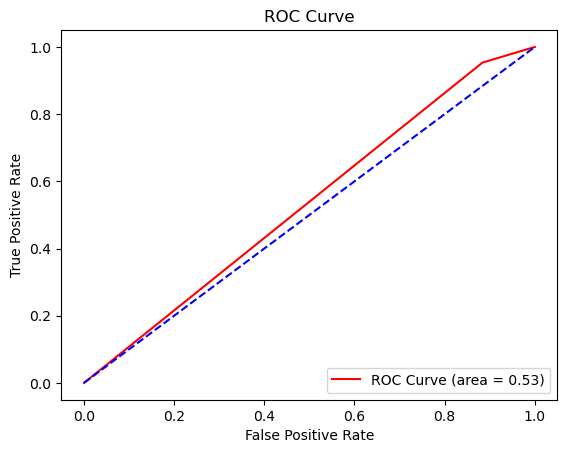

In [148]:
from sklearn.metrics import roc_curve, roc_auc_score
y_pred = df_decision_tree.predict(X_test)
fpr, tpr, thresholds = roc_curve(Y_test, y_pred)
auc_score = roc_auc_score(Y_test, y_pred)
plt.plot(fpr, tpr, color='red', label='ROC Curve (area = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], color='blue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [118]:
df_decision_tree.predict([[1,6,0,35,0,0,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1]])

C:\Users\MrBento\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

# Random Forest Classification

In [119]:
from sklearn import ensemble
R_forest = ensemble.RandomForestClassifier(n_estimators=100)
R_forest.fit(X_train,Y_train)
R_forest.score(X_test,Y_test)

0.7766666666666666

In [120]:
y_pred = R_forest.predict(X_test)
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, y_pred)

array([[ 40,  46],
       [ 21, 193]], dtype=int64)

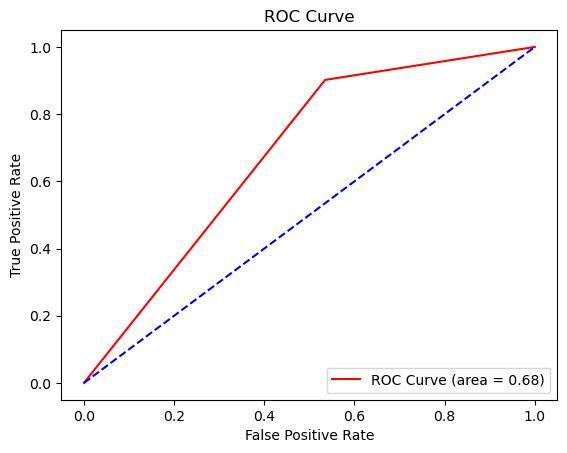

In [147]:
from sklearn.metrics import roc_curve, roc_auc_score
y_pred = R_forest.predict(X_test)
fpr, tpr, thresholds = roc_curve(Y_test, y_pred)
auc_score = roc_auc_score(Y_test, y_pred)
plt.plot(fpr, tpr, color='red', label='ROC Curve (area = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], color='blue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [121]:
R_forest.predict([[1,6,0,35,0,0,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1]])

C:\Users\MrBento\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

# Gradient Boost Classification

In [122]:
Grad_B = ensemble.GradientBoostingClassifier()
Grad_B.fit(X_train,Y_train)
Grad_B.score(X_test,Y_test)

0.7866666666666666

In [123]:
y_pred = Grad_B.predict(X_test)
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, y_pred)

array([[ 48,  38],
       [ 26, 188]], dtype=int64)

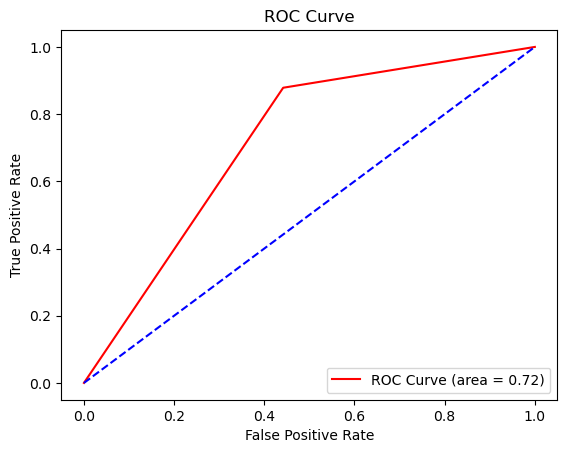

In [146]:
from sklearn.metrics import roc_curve, roc_auc_score
y_pred = Grad_B.predict(X_test)
fpr, tpr, thresholds = roc_curve(Y_test, y_pred)
auc_score = roc_auc_score(Y_test, y_pred)
plt.plot(fpr, tpr, color='red', label='ROC Curve (area = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], color='blue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [124]:
Grad_B.predict([[1,6,0,35,0,0,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1]])

C:\Users\MrBento\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

# Naive B

In [125]:
from sklearn.naive_bayes import GaussianNB
Naive_B = GaussianNB()
Naive_B.fit(X_train,Y_train)
Naive_B.score(X_test,Y_test)

0.7433333333333333

In [126]:
y_pred = Naive_B.predict(X_test)
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, y_pred)

array([[ 56,  30],
       [ 47, 167]], dtype=int64)

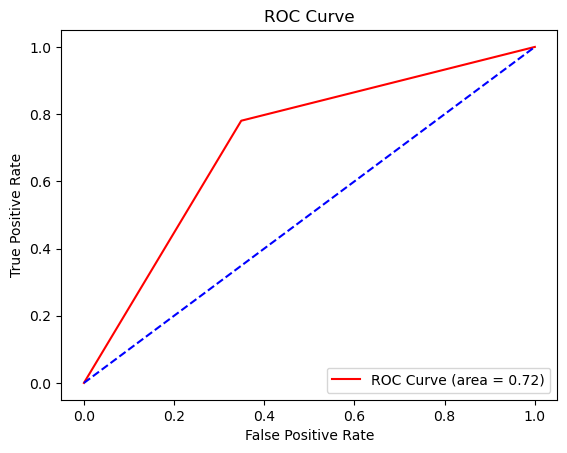

In [145]:
from sklearn.metrics import roc_curve, roc_auc_score
y_pred = Naive_B.predict(X_test)
fpr, tpr, thresholds = roc_curve(Y_test, y_pred)
auc_score = roc_auc_score(Y_test, y_pred)
plt.plot(fpr, tpr, color='red', label='ROC Curve (area = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], color='blue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [127]:
Naive_B.predict([[1,6,0,35,0,0,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1]])

C:\Users\MrBento\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

# KNN Classification

In [128]:
from sklearn.neighbors import KNeighborsClassifier
K_Nearest_N = KNeighborsClassifier(n_neighbors=3)
K_Nearest_N.fit(X_train,Y_train)
K_Nearest_N.score(X_test,Y_test)

0.6533333333333333

In [129]:
y_pred = K_Nearest_N.predict(X_test)
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, y_pred)

array([[ 24,  62],
       [ 42, 172]], dtype=int64)

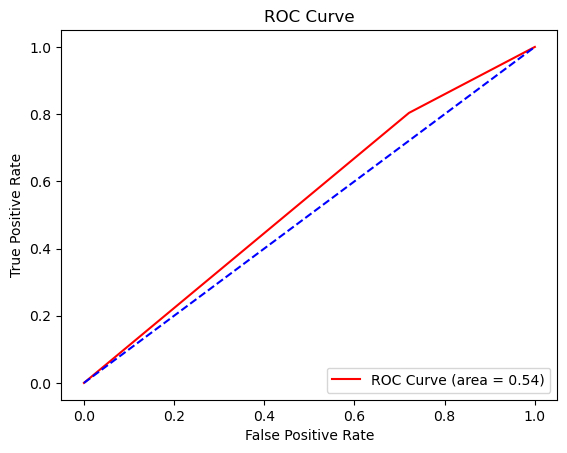

In [144]:
from sklearn.metrics import roc_curve, roc_auc_score
y_pred = K_Nearest_N.predict(X_test)
fpr, tpr, thresholds = roc_curve(Y_test, y_pred)
auc_score = roc_auc_score(Y_test, y_pred)
plt.plot(fpr, tpr, color='red', label='ROC Curve (area = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], color='blue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

# Logistic Classification

In [130]:
from sklearn.linear_model import LogisticRegression
Logistic_R = LogisticRegression()
Logistic_R.fit(X_train,Y_train)
Logistic_R.score(X_test,Y_test)

C:\Users\MrBento\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.74

In [131]:
y_pred = Logistic_R.predict(X_test)
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, y_pred)

array([[ 35,  51],
       [ 27, 187]], dtype=int64)

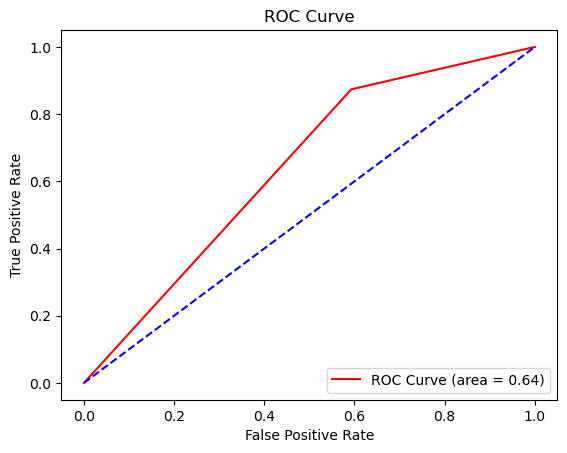

In [143]:
from sklearn.metrics import roc_curve, roc_auc_score
y_pred = Logistic_R.predict(X_test)
fpr, tpr, thresholds = roc_curve(Y_test, y_pred)
auc_score = roc_auc_score(Y_test, y_pred)
plt.plot(fpr, tpr, color='red', label='ROC Curve (area = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], color='blue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()